In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_names = ['degree0', 'degree1', 'degree2']
class_names_label = [0,1,2]
mapclass={0:'degree0',1:'degree1',2:'degree2'}

IMAGE_SIZE = (150, 150)

In [ ]:
def load_train_data():
    images=[]
    labels=[]
    output=[]
    folders=['/content/drive/MyDrive/skin_burn/Train/degree0',
             '/content/drive/MyDrive/skin_burn/Train/degree1',
             '/content/drive/MyDrive/skin_burn/Train/degree2']
    for i in range(0,len(folders)):
        for file in tqdm(os.listdir(folders[i])):
            img_path = os.path.join(folders[i], file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(i)
    images = np.array(images, dtype = 'float32')/255
    labels = np.array(labels, dtype = 'int32')
    return images,labels

In [ ]:
def load_test_data():
    images=[]
    labels=[]
    output=[]
    folders=['/content/drive/MyDrive/skin_burn/Test/degree0',
             '/content/drive/MyDrive/skin_burn/Test/degree1',
             '/content/drive/MyDrive/skin_burn/Test/degree2']
    for i in range(0,len(folders)):
        for file in tqdm(os.listdir(folders[i])):
            img_path = os.path.join(folders[i], file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(i)
    images = np.array(images, dtype = 'float32')/255
    labels = np.array(labels, dtype = 'int32')
    return images,labels

In [ ]:
train_images,train_labels=load_train_data()

100%|██████████| 120/120 [00:01<00:00, 64.39it/s] 


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
test_images,test_labels=load_test_data()

100%|██████████| 55/55 [00:17<00:00,  3.07it/s]


In [ ]:
len(train_images)

736

In [ ]:
len(test_images)

184

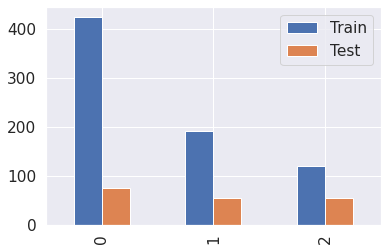

In [ ]:
df=pd.concat([pd.DataFrame(np.unique(train_labels,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(test_labels,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
df.plot(kind='bar');

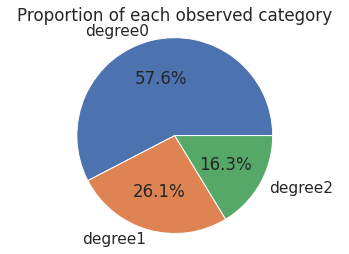

In [ ]:
plt.pie(df['Train'],
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

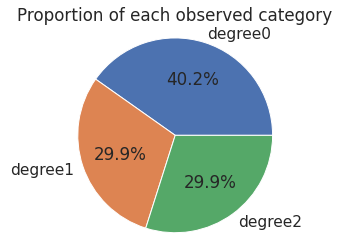

In [ ]:
plt.pie(df['Test'],
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()


In [ ]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(train_labels[index]).map(mapclass))[0]
    else:
        img=test_images[index]
        lbl=list(pd.Series(test_labels[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

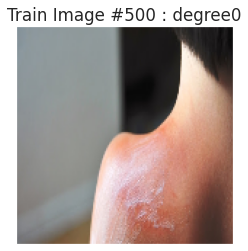

In [ ]:
displayimagebyindex(500,dset='Train')

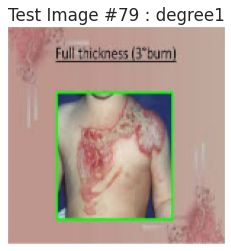

In [ ]:
displayimagebyindex(79,dset='Test')


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100
5/5 [==============================] - 18s 3s/step - loss: 2.0903 - accuracy: 0.3231 - val_loss: 1.0298 - val_accuracy: 0.6081
Epoch 2/100
5/5 [==============================] - 14s 3s/step - loss: 1.0591 - accuracy: 0.5782 - val_loss: 1.0549 - val_accuracy: 0.5676
Epoch 3/100
5/5 [==============================] - 14s 3s/step - loss: 0.9293 - accuracy: 0.6241 - val_loss: 0.8753 - val_accuracy: 0.6216
Epoch 4/100
5/5 [==============================] - 14s 3s/step - loss: 0.8518 - accuracy: 0.6293 - val_loss: 0.8533 - val_accuracy: 0.6216
Epoch 5/100
5/5 [==============================] - 14s 3s/step - loss: 0.7784 - accuracy: 0.6582 - val_loss: 0.8465 - val_accuracy: 0.6014
Epoch 6/100
5/5 [==============================] - 14s 3s/step - loss: 0.7001 - accuracy: 0.7143 - val_loss: 0.8151 - val_accuracy: 0.6486
Epoch 7/100
5/5 [==============================] - 14s 3s/step - loss: 0.6057 - accuracy: 0.7568 - val_loss: 0.8873 - val_accuracy: 0.6284
Epoch 8/100
5/5 [==========

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

6/6 [==============================] - 2s 284ms/step - loss: 2.4917 - accuracy: 0.5272


In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

In [ ]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

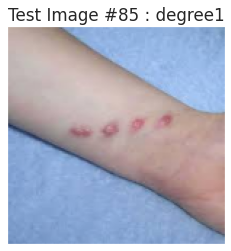

Predicted Class : 
      degree0


In [ ]:
checkpredictions(np.random.randint(1,234))

In [ ]:
#Inception V3

from tensorflow.keras.applications.inception_v3 import InceptionV3 

In [ ]:
inc = InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [ ]:
for i in inc.layers:
  i.trainable = False

In [ ]:
x= tf.keras.layers.Flatten()(inc.output)

In [ ]:
pred = tf.keras.layers.Dense(10,activation='softmax')(x)

In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs=inc.input,outputs=pred)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_96 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_96[0][0]']              
 ormalization)                  )                                                             

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
inc_history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, steps_per_epoch=10)

Epoch 1/30
10/10 [==============================] - 298s 31s/step - loss: 0.8824 - accuracy: 0.6304 - val_loss: 1.1075 - val_accuracy: 0.4239
Epoch 2/30
10/10 [==============================] - 250s 26s/step - loss: 0.7300 - accuracy: 0.6658 - val_loss: 0.8171 - val_accuracy: 0.6033
Epoch 3/30
10/10 [==============================] - 249s 25s/step - loss: 0.6335 - accuracy: 0.7255 - val_loss: 0.7698 - val_accuracy: 0.6576
Epoch 4/30
10/10 [==============================] - 252s 26s/step - loss: 0.5666 - accuracy: 0.7677 - val_loss: 0.7628 - val_accuracy: 0.6304
Epoch 5/30
10/10 [==============================] - 251s 26s/step - loss: 0.4909 - accuracy: 0.8207 - val_loss: 0.7608 - val_accuracy: 0.6359
Epoch 6/30
10/10 [==============================] - 249s 25s/step - loss: 0.4593 - accuracy: 0.8410 - val_loss: 0.7461 - val_accuracy: 0.6413
Epoch 7/30
10/10 [==============================] - 248s 25s/step - loss: 0.4134 - accuracy: 0.8736 - val_loss: 0.7465 - val_accuracy: 0.6685
Epoch 

In [64]:
#VGG19
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt

In [65]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [66]:
for layer in vgg.layers:
    layer.trainable = False

In [67]:
x = Flatten()(vgg.output)

In [68]:
prediction = Dense(3, activation='softmax')(x)

In [69]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

In [70]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
vgg_history = model.fit(train_labels, validation_data = train_images, epochs=10,steps_per_epoch=len(train_images),validation_steps=len(train_labels))